# 🛍️ AI-Powered Customer Segmentation Dashboard
## K-Means Clustering with Interactive Streamlit Dashboard

**For Dataset with columns:**
- CustomerID
- Gender
- Age
- Annual Income (k$)
- Spending Score (1-100)

This notebook provides:
- **K-Means Clustering** for customer segmentation
- **AI-powered insights** and recommendations
- **Interactive Streamlit dashboard** for visualization
- **Comprehensive analysis** of customer behavior patterns

## 📦 Installation and Setup

In [1]:
# Install required packages
!pip install streamlit pandas numpy matplotlib seaborn scikit-learn plotly kaleido pyngrok
!npm install -g localtunnel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.8 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
added 22 packages in 2s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import streamlit as st
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
from google.colab import files

warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

## 📂 Upload Your Dataset

In [1]:
# # Upload your CSV file
# print("📁 Please upload your CSV file with customer data...")
# uploaded = files.upload()

# # Get the uploaded filename
# filename = list(uploaded.keys())[0]
# print(f"✅ File '{filename}' uploaded successfully!")

## 🔍 Load and Explore Dataset

In [3]:
# Load dataset using pd.read_csv as requested
df = pd.read_csv('/content/Mall_Customers.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset loaded successfully!
Shape: (200, 5)

Column names:
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

First few rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-n

## ⚙️ Data Preprocessing

In [4]:
# Standardize column names for easier processing
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Handle missing values if any
df = df.dropna()

# Convert categorical gender to numerical
df['Gender_Encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select features for clustering (numerical features only)
clustering_features = ['Age', 'Annual_Income', 'Spending_Score']

print(f"\nFeatures selected for clustering: {clustering_features}")
print(f"Dataset shape after preprocessing: {df.shape}")

Missing values:
CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

Features selected for clustering: ['Age', 'Annual_Income', 'Spending_Score']
Dataset shape after preprocessing: (200, 6)


## 📊 Exploratory Data Analysis

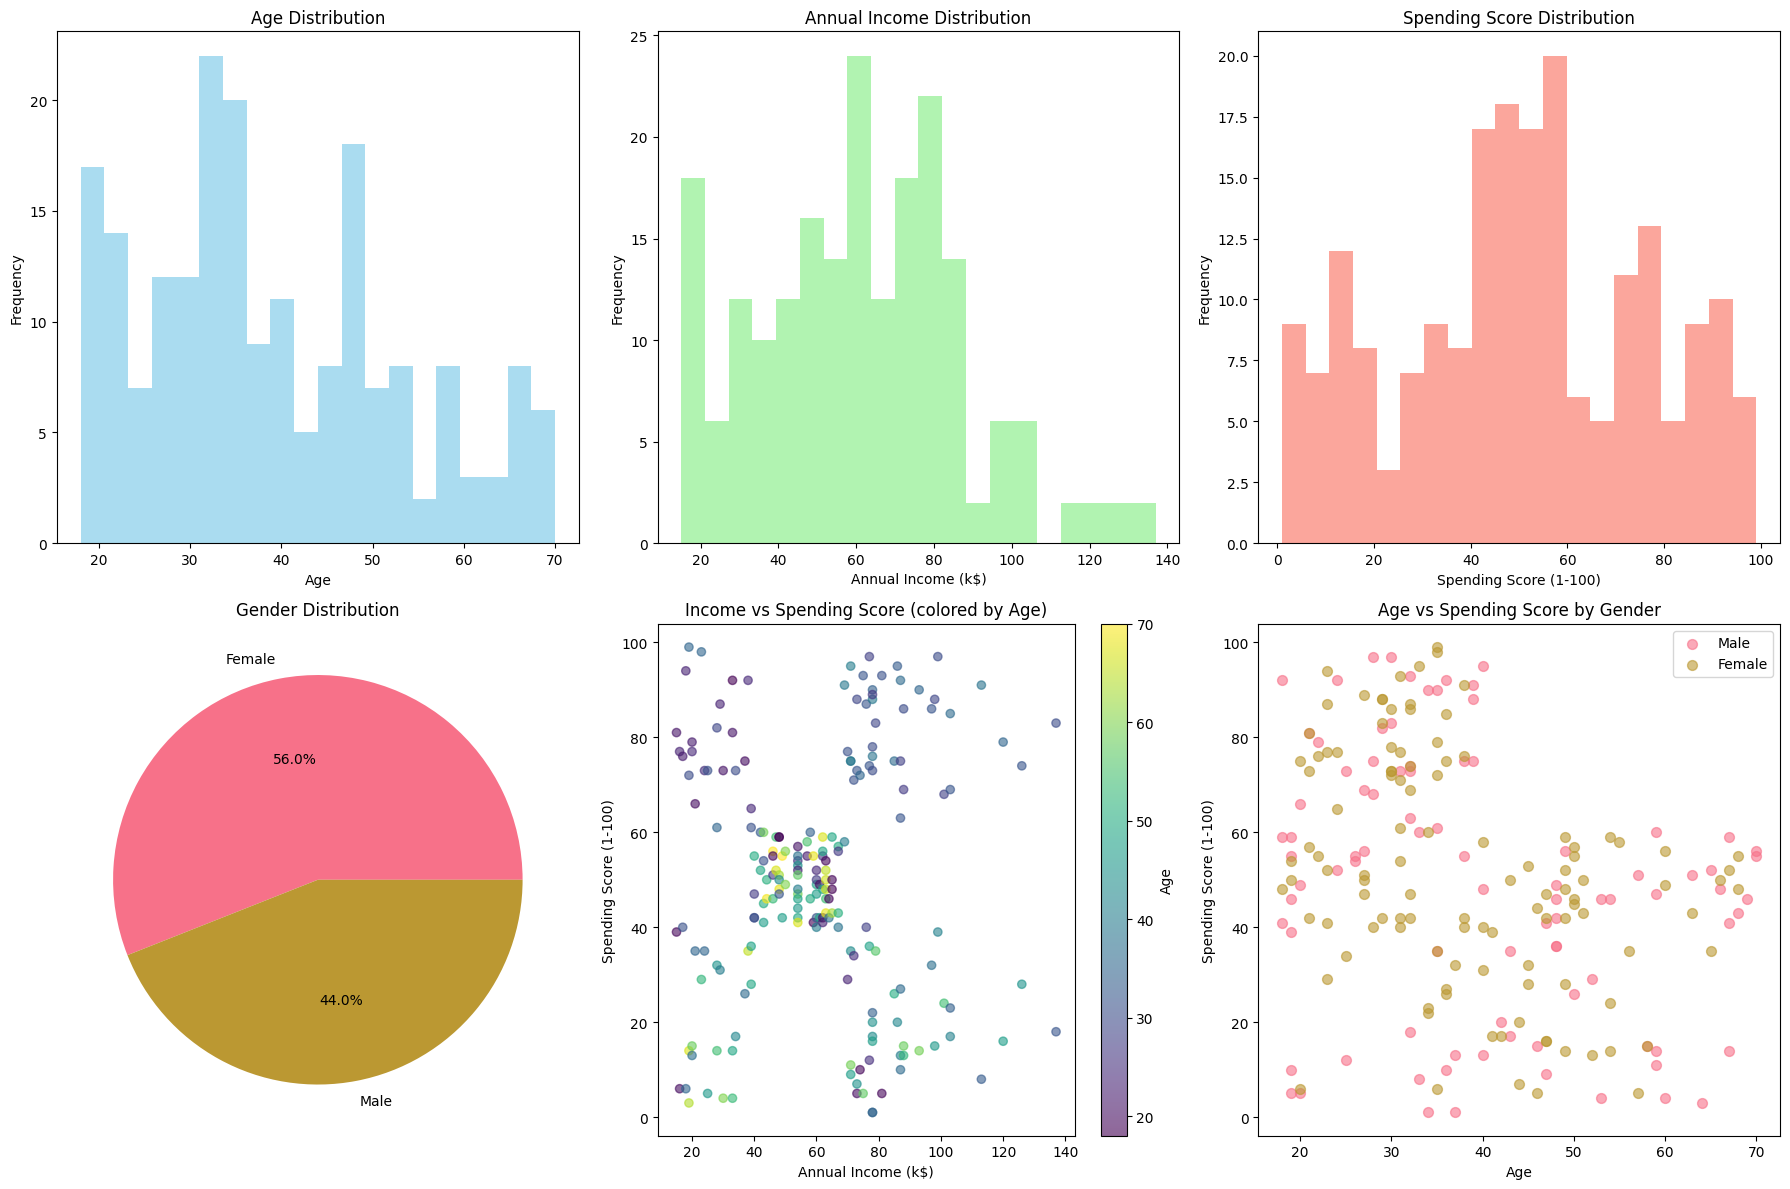

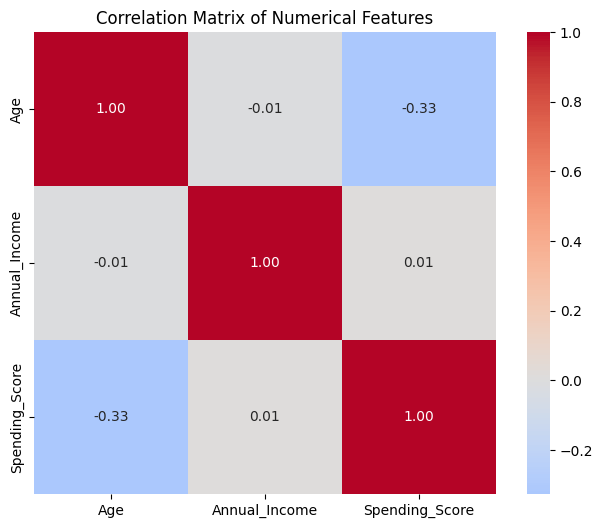

In [5]:
# Basic EDA for your dataset
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Age distribution
axes[0, 0].hist(df['Age'], bins=20, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Annual Income distribution
axes[0, 1].hist(df['Annual_Income'], bins=20, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Annual Income Distribution')
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Frequency')

# Spending Score distribution
axes[0, 2].hist(df['Spending_Score'], bins=20, alpha=0.7, color='salmon')
axes[0, 2].set_title('Spending Score Distribution')
axes[0, 2].set_xlabel('Spending Score (1-100)')
axes[0, 2].set_ylabel('Frequency')

# Gender distribution
gender_counts = df['Gender'].value_counts()
axes[1, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
axes[1, 0].set_title('Gender Distribution')

# Income vs Spending Score
axes[1, 1].scatter(df['Annual_Income'], df['Spending_Score'], alpha=0.6, c=df['Age'], cmap='viridis')
axes[1, 1].set_xlabel('Annual Income (k$)')
axes[1, 1].set_ylabel('Spending Score (1-100)')
axes[1, 1].set_title('Income vs Spending Score (colored by Age)')
cbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])
cbar.set_label('Age')

# Age vs Spending Score by Gender
for gender in df['Gender'].unique():
    gender_data = df[df['Gender'] == gender]
    axes[1, 2].scatter(gender_data['Age'], gender_data['Spending_Score'],
                      alpha=0.6, label=gender, s=50)
axes[1, 2].set_xlabel('Age')
axes[1, 2].set_ylabel('Spending Score (1-100)')
axes[1, 2].set_title('Age vs Spending Score by Gender')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

# Correlation matrix
numeric_cols = ['Age', 'Annual_Income', 'Spending_Score']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 🎯 Finding Optimal Number of Clusters

Scaled data shape: (200, 3)
Features used: ['Age', 'Annual_Income', 'Spending_Score']


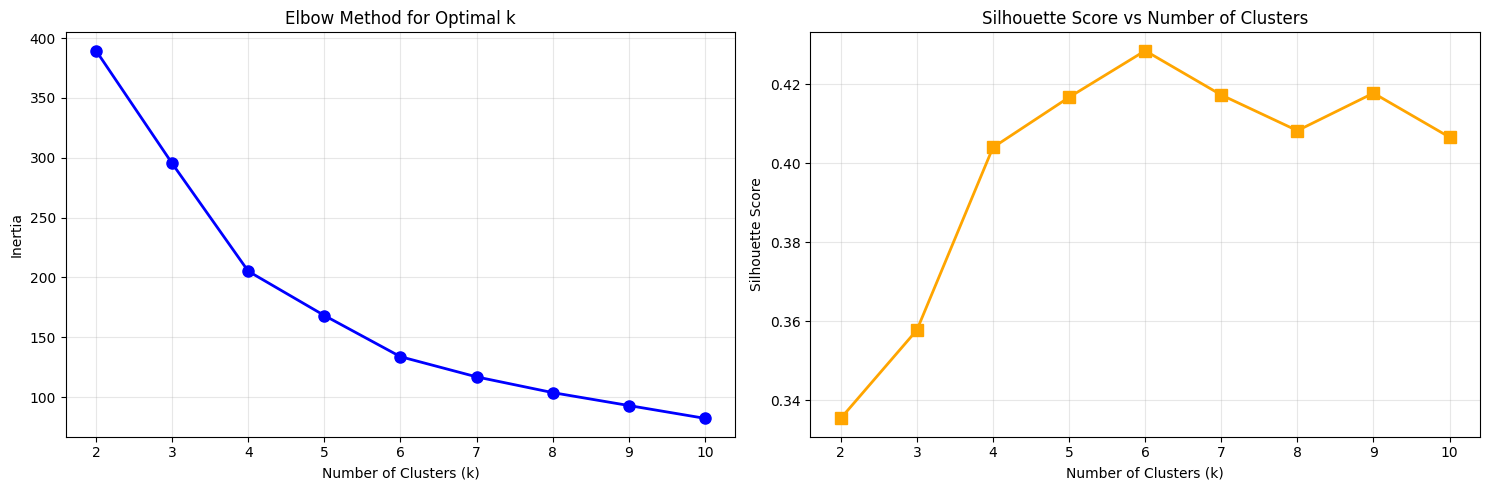


Optimal number of clusters based on silhouette score: 6
Maximum silhouette score: 0.428

Detailed Analysis:
k=2: Inertia=389.39, Silhouette Score=0.335
k=3: Inertia=295.21, Silhouette Score=0.358
k=4: Inertia=205.23, Silhouette Score=0.404
k=5: Inertia=168.25, Silhouette Score=0.417
k=6: Inertia=133.87, Silhouette Score=0.428
k=7: Inertia=117.01, Silhouette Score=0.417
k=8: Inertia=103.87, Silhouette Score=0.408
k=9: Inertia=93.09, Silhouette Score=0.418
k=10: Inertia=82.39, Silhouette Score=0.407


In [6]:
# Prepare data for clustering
X = df[clustering_features].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Scaled data shape: {X_scaled.shape}")
print(f"Features used: {clustering_features}")

# Elbow Method and Silhouette Analysis
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow curve
ax1.plot(k_range, inertias, marker='o', linewidth=2, markersize=8, color='blue')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True, alpha=0.3)

# Silhouette scores
ax2.plot(k_range, silhouette_scores, marker='s', linewidth=2, markersize=8, color='orange')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal k
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal number of clusters based on silhouette score: {optimal_k}")
print(f"Maximum silhouette score: {max(silhouette_scores):.3f}")

# Display all scores for reference
print("\nDetailed Analysis:")
for k, inertia, sil_score in zip(k_range, inertias, silhouette_scores):
    print(f"k={k}: Inertia={inertia:.2f}, Silhouette Score={sil_score:.3f}")

## 🤖 K-Means Clustering Implementation

In [7]:
# Apply K-Means with optimal number of clusters
n_clusters = optimal_k
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# Calculate cluster statistics
cluster_stats = df.groupby('Cluster')[clustering_features].agg(['mean', 'median', 'std']).round(2)

print(f"K-Means clustering completed with {n_clusters} clusters")
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.3f}")
print(f"\nCluster distribution:")
print(df['Cluster'].value_counts().sort_index())

print("\nCluster Statistics:")
print(cluster_stats)

# Show sample customers from each cluster
print("\n📋 Sample customers from each cluster:")
for cluster in sorted(df['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_sample = df[df['Cluster'] == cluster].head(3)
    print(cluster_sample[['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Cluster']])

K-Means clustering completed with 6 clusters
Silhouette Score: 0.428

Cluster distribution:
Cluster
0    45
1    39
2    33
3    39
4    23
5    21
Name: count, dtype: int64

Cluster Statistics:
           Age               Annual_Income               Spending_Score  \
          mean median    std          mean median    std           mean   
Cluster                                                                   
0        56.33   54.0   8.45         54.27   54.0   8.98          49.07   
1        26.79   26.0   7.06         57.10   60.0  10.16          48.13   
2        41.94   43.0  10.18         88.94   86.0  16.59          16.97   
3        32.69   32.0   3.73         86.54   79.0  16.31          82.13   
4        25.00   23.0   5.30         25.26   24.0   7.72          77.61   
5        45.52   46.0  11.77         26.29   25.0   7.44          19.38   

                       
        median    std  
Cluster                
0         49.0   6.30  
1         50.0   9.97  
2        

## 📊 Cluster Visualization

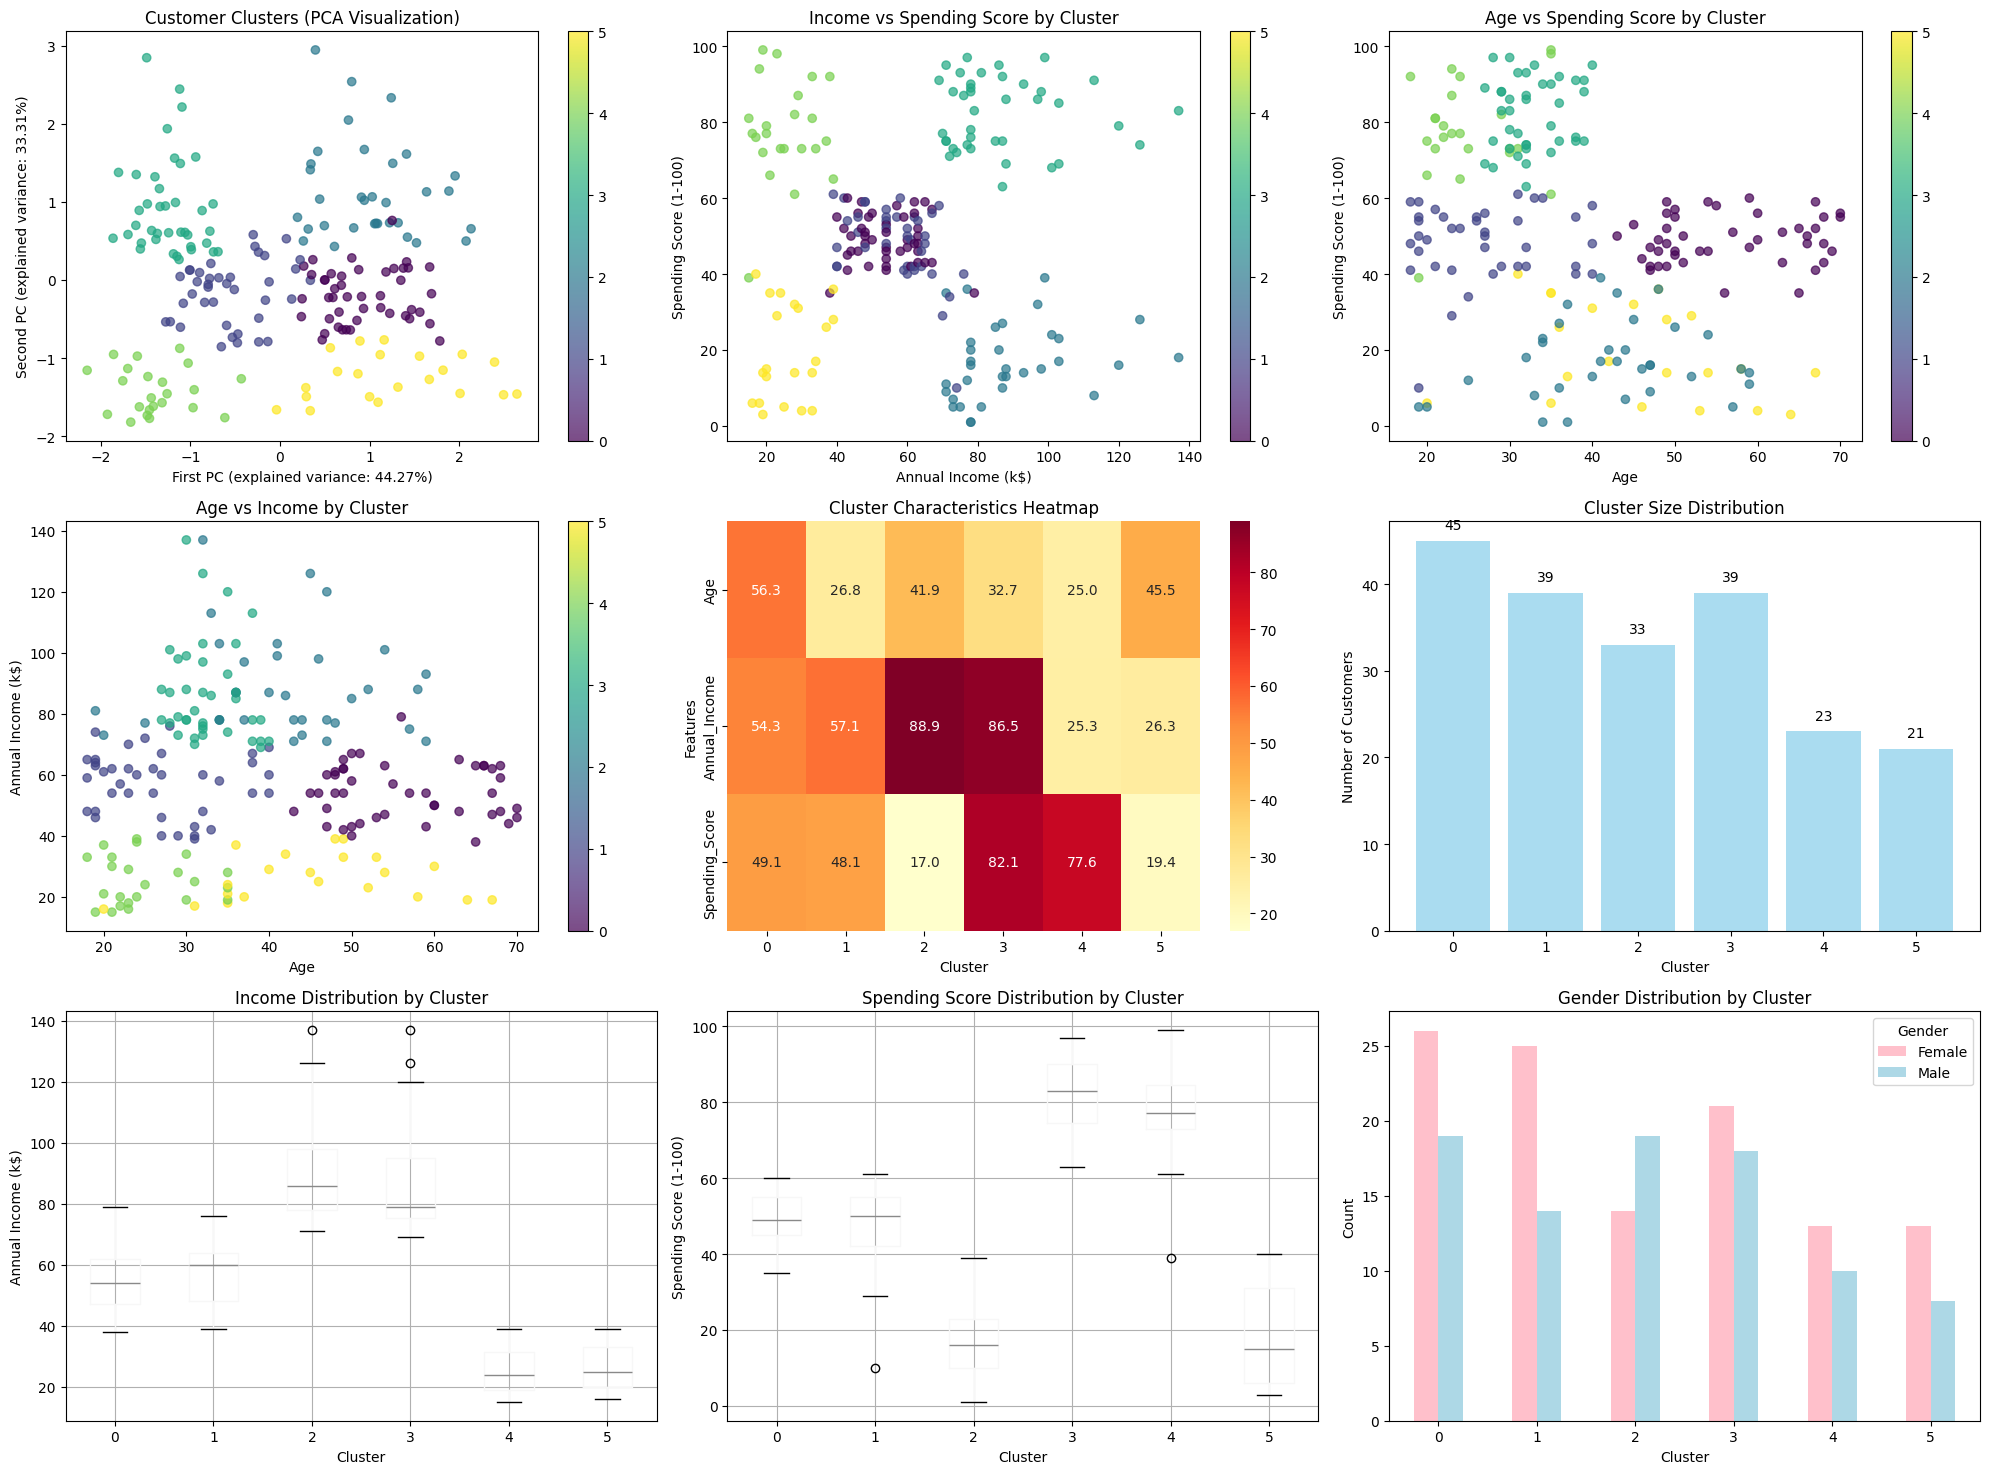

In [8]:
# Create comprehensive visualization
fig = plt.figure(figsize=(20, 15))

# 1. PCA scatter plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.subplot(3, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel(f'First PC (explained variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Second PC (explained variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('Customer Clusters (PCA Visualization)')
plt.colorbar(scatter)

# 2. Income vs Spending Score
plt.subplot(3, 3, 2)
scatter = plt.scatter(df['Annual_Income'], df['Spending_Score'], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs Spending Score by Cluster')
plt.colorbar(scatter)

# 3. Age vs Spending Score
plt.subplot(3, 3, 3)
scatter = plt.scatter(df['Age'], df['Spending_Score'], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score by Cluster')
plt.colorbar(scatter)

# 4. Age vs Income
plt.subplot(3, 3, 4)
scatter = plt.scatter(df['Age'], df['Annual_Income'], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Income by Cluster')
plt.colorbar(scatter)

# 5. Cluster characteristics heatmap
plt.subplot(3, 3, 5)
cluster_means = df.groupby('Cluster')[clustering_features].mean()
sns.heatmap(cluster_means.T, annot=True, cmap='YlOrRd', fmt='.1f', cbar=True)
plt.title('Cluster Characteristics Heatmap')
plt.ylabel('Features')

# 6. Cluster size distribution
plt.subplot(3, 3, 6)
cluster_counts = df['Cluster'].value_counts().sort_index()
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue', alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Cluster Size Distribution')
# Add value labels on bars
for bar, count in zip(bars, cluster_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(count), ha='center', va='bottom')

# 7. Box plot for Income by cluster
plt.subplot(3, 3, 7)
df.boxplot(column='Annual_Income', by='Cluster', ax=plt.gca())
plt.title('Income Distribution by Cluster')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')

# 8. Box plot for Spending Score by cluster
plt.subplot(3, 3, 8)
df.boxplot(column='Spending_Score', by='Cluster', ax=plt.gca())
plt.title('Spending Score Distribution by Cluster')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')

# 9. Gender distribution by cluster
plt.subplot(3, 3, 9)
gender_cluster = pd.crosstab(df['Cluster'], df['Gender'])
gender_cluster.plot(kind='bar', ax=plt.gca(), color=['pink', 'lightblue'])
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## 🧠 AI-Powered Customer Insights

In [9]:
# AI-powered customer segment analysis and recommendations
def generate_ai_insights_for_your_data(df):
    """Generate AI-powered insights for each customer segment based on your dataset"""

    insights = {}

    for cluster in sorted(df['Cluster'].unique()):
        cluster_data = df[df['Cluster'] == cluster]

        # Calculate key metrics
        avg_age = cluster_data['Age'].mean()
        avg_income = cluster_data['Annual_Income'].mean()
        avg_spending = cluster_data['Spending_Score'].mean()
        cluster_size = len(cluster_data)
        gender_distribution = cluster_data['Gender'].value_counts()
        dominant_gender = gender_distribution.index[0]

        # Determine segment characteristics
        if avg_income > df['Annual_Income'].quantile(0.75):
            income_level = "High Income"
        elif avg_income > df['Annual_Income'].quantile(0.25):
            income_level = "Medium Income"
        else:
            income_level = "Low Income"

        if avg_spending > df['Spending_Score'].quantile(0.75):
            spending_behavior = "High Spenders"
        elif avg_spending > df['Spending_Score'].quantile(0.25):
            spending_behavior = "Medium Spenders"
        else:
            spending_behavior = "Conservative Spenders"

        if avg_age < 30:
            age_group = "Young Adults"
        elif avg_age < 50:
            age_group = "Middle-Aged"
        else:
            age_group = "Mature Adults"

        # Generate segment name
        segment_name = f"{age_group} {income_level} {spending_behavior}"

        # Generate strategic recommendations
        recommendations = []

        if avg_income > df['Annual_Income'].quantile(0.75) and avg_spending > df['Spending_Score'].quantile(0.75):
            recommendations.extend([
                "💎 Premium product portfolio targeting",
                "🏆 VIP membership and exclusive experiences",
                "🎁 Luxury brand partnerships and collaborations",
                "📞 Personal shopping and concierge services"
            ])
        elif avg_income > df['Annual_Income'].quantile(0.50) and avg_spending < df['Spending_Score'].quantile(0.25):
            recommendations.extend([
                "🎯 Value proposition education campaigns",
                "💰 Limited-time offers and seasonal discounts",
                "📊 Product demonstrations and trial offers",
                "🤝 Trust-building through reviews and testimonials"
            ])
        elif avg_spending > df['Spending_Score'].quantile(0.75) and avg_income < df['Annual_Income'].quantile(0.50):
            recommendations.extend([
                "💳 Flexible payment options and installments",
                "🎉 Reward programs for frequent purchases",
                "📱 Mobile-first shopping experience",
                "💝 Bundle offers and package deals"
            ])
        elif avg_age < 30:
            recommendations.extend([
                "📲 Social media marketing and influencer partnerships",
                "🌟 Trendy and innovative product lines",
                "🎮 Gamification and interactive experiences",
                "🚀 Early access to new products and features"
            ])
        elif avg_age > 50:
            recommendations.extend([
                "📞 Traditional customer service channels",
                "📧 Email marketing with clear value propositions",
                "🛡️ Quality assurance and warranty programs",
                "👨‍👩‍👧‍👦 Family-oriented product messaging"
            ])
        else:
            recommendations.extend([
                "📊 A/B test different marketing approaches",
                "🔄 Cross-selling and upselling opportunities",
                "📈 Market research for better segmentation",
                "🎨 Improve product presentation and positioning"
            ])

        # Determine business priority
        if avg_income > df['Annual_Income'].quantile(0.75) and avg_spending > df['Spending_Score'].quantile(0.75):
            priority = "🌟 High Priority - Key Revenue Drivers"
        elif avg_spending > df['Spending_Score'].quantile(0.50):
            priority = "⭐ Medium Priority - Growth Potential"
        else:
            priority = "💡 Low Priority - Nurture for Future"

        insights[cluster] = {
            'segment_name': segment_name,
            'size': cluster_size,
            'avg_age': avg_age,
            'avg_income': avg_income,
            'avg_spending': avg_spending,
            'dominant_gender': dominant_gender,
            'gender_split': dict(gender_distribution),
            'recommendations': recommendations,
            'priority': priority,
            'income_level': income_level,
            'spending_behavior': spending_behavior,
            'age_group': age_group
        }

    return insights

# Generate insights
ai_insights = generate_ai_insights_for_your_data(df)

# Display insights
print("🧠 AI-POWERED CUSTOMER SEGMENT INSIGHTS")
print("=" * 60)

for cluster, insight in ai_insights.items():
    print(f"\n🎯 CLUSTER {cluster}: {insight['segment_name']}")
    print(f"📊 Business Priority: {insight['priority']}")
    print(f"👥 Size: {insight['size']} customers ({insight['size']/len(df)*100:.1f}% of total)")
    print(f"🎂 Average Age: {insight['avg_age']:.1f} years ({insight['age_group']})")
    print(f"💰 Average Income: ${insight['avg_income']:.1f}k ({insight['income_level']})")
    print(f"🛒 Average Spending Score: {insight['avg_spending']:.1f}/100 ({insight['spending_behavior']})")
    print(f"👤 Gender Split: {insight['gender_split']} (Dominant: {insight['dominant_gender']})")
    print("\n📋 STRATEGIC RECOMMENDATIONS:")
    for i, rec in enumerate(insight['recommendations'], 1):
        print(f"   {i}. {rec}")
    print("-" * 50)

🧠 AI-POWERED CUSTOMER SEGMENT INSIGHTS

🎯 CLUSTER 0: Mature Adults Medium Income Medium Spenders
📊 Business Priority: 💡 Low Priority - Nurture for Future
👥 Size: 45 customers (22.5% of total)
🎂 Average Age: 56.3 years (Mature Adults)
💰 Average Income: $54.3k (Medium Income)
🛒 Average Spending Score: 49.1/100 (Medium Spenders)
👤 Gender Split: {'Female': np.int64(26), 'Male': np.int64(19)} (Dominant: Female)

📋 STRATEGIC RECOMMENDATIONS:
   1. 📞 Traditional customer service channels
   2. 📧 Email marketing with clear value propositions
   3. 🛡️ Quality assurance and warranty programs
   4. 👨‍👩‍👧‍👦 Family-oriented product messaging
--------------------------------------------------

🎯 CLUSTER 1: Young Adults Medium Income Medium Spenders
📊 Business Priority: 💡 Low Priority - Nurture for Future
👥 Size: 39 customers (19.5% of total)
🎂 Average Age: 26.8 years (Young Adults)
💰 Average Income: $57.1k (Medium Income)
🛒 Average Spending Score: 48.1/100 (Medium Spenders)
👤 Gender Split: {'Female'

## 🎛️ Interactive Streamlit Dashboard

In [10]:
# Create Streamlit dashboard application for your specific dataset
dashboard_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Page configuration
st.set_page_config(
    page_title="🛍️ Customer Segmentation Dashboard",
    page_icon="🛍️",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS
st.markdown("""
<style>
.main-header {
    font-size: 3rem;
    color: #1f77b4;
    text-align: center;
    margin-bottom: 2rem;
}
.metric-card {
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
    padding: 1rem;
    border-radius: 10px;
    color: white;
    margin: 0.5rem 0;
}
.insight-box {
    background: #f0f2f6;
    padding: 1rem;
    border-radius: 10px;
    border-left: 5px solid #1f77b4;
    margin: 1rem 0;
}
</style>
""", unsafe_allow_html=True)


@st.cache_data
def load_sample_data():
    """Create sample data matching your dataset structure"""
    np.random.seed(42)
    n_customers = 200

    data = {
        'CustomerID': range(1, n_customers + 1),
        'Gender': np.random.choice(['Male', 'Female'], n_customers),
        'Age': np.random.randint(18, 70, n_customers),
        'Annual Income (k$)': np.random.randint(15, 140, n_customers),
        'Spending Score (1-100)': np.random.randint(1, 100, n_customers)
    }

    return pd.DataFrame(data)

@st.cache_data
def perform_clustering(df, n_clusters):
    """Perform K-means clustering on your dataset"""
    # Standardize column names
    df_work = df.copy()
    if 'Annual Income (k$)' in df_work.columns:
        df_work['Annual_Income'] = df_work['Annual Income (k$)']
    if 'Spending Score (1-100)' in df_work.columns:
        df_work['Spending_Score'] = df_work['Spending Score (1-100)']

    clustering_features = ['Age', 'Annual_Income', 'Spending_Score']

    X = df_work[clustering_features].fillna(df_work[clustering_features].mean())
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    df_clustered = df_work.copy()
    df_clustered['Cluster'] = labels

    return df_clustered, X_scaled, scaler, kmeans

def main():
    # Main title
    st.markdown('<h1 class="main-header">🛍️ Customer Segmentation Dashboard</h1>', unsafe_allow_html=True)

    # File upload
    st.sidebar.header("📁 Upload Your Dataset")
    uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

    if uploaded_file is not None:
        df = pd.read_csv(uploaded_file)
        st.sidebar.success("File uploaded successfully!")
    else:
        st.sidebar.info("Using sample data for demonstration")
        df = load_sample_data()

    # Show dataset info
    st.sidebar.subheader("📊 Dataset Info")
    st.sidebar.write(f"**Rows:** {len(df)}")
    st.sidebar.write(f"**Columns:** {len(df.columns)}")

    # Controls
    st.sidebar.header("🎛️ Controls")
    n_clusters = st.sidebar.slider("Number of Clusters", min_value=2, max_value=8, value=5)

    # Perform clustering
    df_clustered, X_scaled, scaler, kmeans = perform_clustering(df, n_clusters)

    # Filters
    st.sidebar.subheader("🔍 Filters")

    age_range = st.sidebar.slider(
        "Age Range",
        min_value=int(df_clustered['Age'].min()),
        max_value=int(df_clustered['Age'].max()),
        value=(int(df_clustered['Age'].min()), int(df_clustered['Age'].max()))
    )

    selected_genders = st.sidebar.multiselect(
        "Select Genders",
        options=df_clustered['Gender'].unique(),
        default=df_clustered['Gender'].unique()
    )

    selected_clusters = st.sidebar.multiselect(
        "Select Clusters",
        options=sorted(df_clustered['Cluster'].unique()),
        default=sorted(df_clustered['Cluster'].unique())
    )

    # Filter data
    filtered_df = df_clustered[
        (df_clustered['Age'].between(age_range[0], age_range[1])) &
        (df_clustered['Gender'].isin(selected_genders)) &
        (df_clustered['Cluster'].isin(selected_clusters))
    ]

    # Main metrics
    col1, col2, col3, col4 = st.columns(4)

    with col1:
        st.markdown(f"""
        <div class="metric-card">
            <h3>👥 Total Customers</h3>
            <h2>{len(filtered_df):,}</h2>
        </div>
        """, unsafe_allow_html=True)

    with col2:
        avg_income = filtered_df['Annual_Income'].mean()
        st.markdown(f"""
        <div class="metric-card">
            <h3>💰 Avg Income</h3>
            <h2>${avg_income:,.0f}k</h2>
        </div>
        """, unsafe_allow_html=True)

    with col3:
        avg_spending = filtered_df['Spending_Score'].mean()
        st.markdown(f"""
        <div class="metric-card">
            <h3>🛒 Avg Spending Score</h3>
            <h2>{avg_spending:.1f}/100</h2>
        </div>
        """, unsafe_allow_html=True)

    with col4:
        silhouette = silhouette_score(X_scaled, df_clustered['Cluster'])
        st.markdown(f"""
        <div class="metric-card">
            <h3>📊 Silhouette Score</h3>
            <h2>{silhouette:.3f}</h2>
        </div>
        """, unsafe_allow_html=True)

    # Tabs
    tab1, tab2, tab3, tab4 = st.tabs(["📊 Cluster Analysis", "🎯 Segment Insights", "📈 Visualizations", "📋 Data Table"])

    with tab1:
        st.subheader("📊 Cluster Analysis")

        col1, col2 = st.columns(2)

        with col1:
            # Cluster distribution
            cluster_counts = filtered_df['Cluster'].value_counts().sort_index()
            fig_pie = px.pie(
                values=cluster_counts.values,
                names=[f'Cluster {i}' for i in cluster_counts.index],
                title="Cluster Distribution"
            )
            st.plotly_chart(fig_pie, use_container_width=True)

        with col2:
            # 3D scatter plot
            fig_3d = px.scatter_3d(
                filtered_df,
                x='Age',
                y='Annual_Income',
                z='Spending_Score',
                color='Cluster',
                title="3D Customer Segmentation",
                labels={
                    'Age': 'Age',
                    'Annual_Income': 'Annual Income (k$)',
                    'Spending_Score': 'Spending Score (1-100)'
                }
            )
            st.plotly_chart(fig_3d, use_container_width=True)

        # Cluster statistics
        st.subheader("📋 Cluster Statistics")
        cluster_stats = filtered_df.groupby('Cluster')[[
            'Age', 'Annual_Income', 'Spending_Score'
        ]].agg(['mean', 'median', 'count']).round(2)

        st.dataframe(cluster_stats, use_container_width=True)

    with tab2:
        st.subheader("🎯 Customer Segment Insights")

        for cluster in sorted(filtered_df['Cluster'].unique()):
            cluster_data = filtered_df[filtered_df['Cluster'] == cluster]

            if len(cluster_data) > 0:
                avg_age = cluster_data['Age'].mean()
                avg_income = cluster_data['Annual_Income'].mean()
                avg_spending = cluster_data['Spending_Score'].mean()
                cluster_size = len(cluster_data)

                # Segment characterization
                if avg_income > filtered_df['Annual_Income'].quantile(0.75):
                    income_desc = "💰 High Income"
                elif avg_income > filtered_df['Annual_Income'].quantile(0.25):
                    income_desc = "💵 Medium Income"
                else:
                    income_desc = "💸 Budget Conscious"

                if avg_spending > filtered_df['Spending_Score'].quantile(0.75):
                    spending_desc = "🛍️ High Spenders"
                elif avg_spending > filtered_df['Spending_Score'].quantile(0.25):
                    spending_desc = "🛒 Moderate Spenders"
                else:
                    spending_desc = "🤔 Conservative Spenders"

                st.markdown(f"""
                <div class="insight-box">
                    <h3>🎯 Cluster {cluster}: {income_desc} | {spending_desc}</h3>
                    <p><strong>Size:</strong> {cluster_size} customers ({cluster_size/len(filtered_df)*100:.1f}%)</p>
                    <p><strong>Average Age:</strong> {avg_age:.1f} years</p>
                    <p><strong>Average Income:</strong> ${avg_income:.1f}k</p>
                    <p><strong>Average Spending Score:</strong> {avg_spending:.1f}/100</p>
                </div>
                """, unsafe_allow_html=True)

    with tab3:
        st.subheader("📈 Advanced Visualizations")

        # Income vs Spending Score
        fig_scatter = px.scatter(
            filtered_df,
            x='Annual_Income',
            y='Spending_Score',
            color='Cluster',
            size='Age',
            title="Income vs Spending Score (size = age)",
            labels={
                'Annual_Income': 'Annual Income (k$)',
                'Spending_Score': 'Spending Score (1-100)'
            }
        )
        st.plotly_chart(fig_scatter, use_container_width=True)

        # Age distribution by cluster
        fig_age = px.histogram(
            filtered_df,
            x='Age',
            color='Cluster',
            title="Age Distribution by Cluster",
            nbins=20
        )
        st.plotly_chart(fig_age, use_container_width=True)

        # Gender distribution by cluster
        gender_cluster = pd.crosstab(filtered_df['Cluster'], filtered_df['Gender'])
        fig_gender = px.bar(
            gender_cluster,
            title="Gender Distribution by Cluster",
            color_discrete_map={'Male': 'lightblue', 'Female': 'pink'}
        )
        st.plotly_chart(fig_gender, use_container_width=True)

    with tab4:
        st.subheader("📋 Customer Data")

        # Display filtered data
        st.dataframe(filtered_df, use_container_width=True)

        # Download button
        csv = filtered_df.to_csv(index=False)
        st.download_button(
            label="📥 Download Filtered Data as CSV",
            data=csv,
            file_name="customer_segmentation_results.csv",
            mime="text/csv"
        )

if __name__ == "__main__":
    main()
'''

# Save the Streamlit app
with open('customer_dashboard_your_data.py', 'w') as f:
    f.write(dashboard_code)

print("✅ Streamlit dashboard created: 'customer_dashboard_your_data.py'")
print("\n📋 Dashboard features for your dataset:")
print("   • File upload for your CSV with CustomerID, Gender, Age, Annual Income, Spending Score")
print("   • Real-time clustering with your exact columns")
print("   • Interactive filtering by age, gender, and clusters")
print("   • 3D visualization of Age vs Income vs Spending Score")
print("   • AI-powered segment insights")
print("   • Download filtered results")



✅ Streamlit dashboard created: 'customer_dashboard_your_data.py'

📋 Dashboard features for your dataset:
   • File upload for your CSV with CustomerID, Gender, Age, Annual Income, Spending Score
   • Real-time clustering with your exact columns
   • Interactive filtering by age, gender, and clusters
   • 3D visualization of Age vs Income vs Spending Score
   • AI-powered segment insights
   • Download filtered results


## 🚀 Run Your Interactive Dashboard

In [11]:
from pyngrok import ngrok

# Replace with your authtoken
ngrok.set_auth_token("32zmvhNVtZDb8IvF0BCYFGKeoDo_47DC663rBwWpjbyAw1kqC")


In [15]:
# Setup and run Streamlit dashboard with ngrok for your dataset
import subprocess
import threading
import time
from pyngrok import ngrok

def run_streamlit():
    """Run Streamlit app in background"""
    subprocess.run(['streamlit', 'run', 'customer_dashboard_your_data.py', '--server.port', '8501', '--server.headless', 'true'])

# Start Streamlit in background
print("🚀 Starting your customer segmentation dashboard...")
print("📊 Dashboard tailored for your dataset structure")

streamlit_thread = threading.Thread(target=run_streamlit)
streamlit_thread.daemon = True
streamlit_thread.start()

# Wait for Streamlit to start
time.sleep(10)

# Setup ngrok tunnel
try:
    # Kill existing tunnels
    ngrok.kill()

    # Create new tunnel
    public_url = ngrok.connect(8501)

    print("✅ Your dashboard is now live!")
    print(f"\n🌐 Access URL: {public_url}")
    print("\n🎯 Your Dashboard Features:")
    print("   📁 Upload your CSV file with the exact columns you have")
    print("   🎛️ Interactive clustering controls (2-8 clusters)")
    print("   🔍 Filter by age, gender, and clusters")
    print("   📊 3D visualization of your customer data")
    print("   🧠 AI-powered insights for each segment")
    print("   📈 Advanced visualizations and statistics")
    print("   📥 Download results as CSV")

    print("\n📋 How to use:")
    print("   1. Click the URL above to open dashboard")
    print("   2. Upload your CSV file using the sidebar")
    print("   3. Adjust number of clusters as needed")
    print("   4. Explore different tabs for insights")
    print("   5. Use filters to focus on specific segments")

except Exception as e:
    print(f"❌ Error setting up dashboard: {e}")
    print("\n🔧 Alternative: Run locally with:")
    print("   streamlit run customer_dashboard_your_data.py")

🚀 Starting your customer segmentation dashboard...
📊 Dashboard tailored for your dataset structure
✅ Your dashboard is now live!

🌐 Access URL: NgrokTunnel: "https://c8dd91712fb0.ngrok-free.app" -> "http://localhost:8501"

🎯 Your Dashboard Features:
   📁 Upload your CSV file with the exact columns you have
   🎛️ Interactive clustering controls (2-8 clusters)
   🔍 Filter by age, gender, and clusters
   📊 3D visualization of your customer data
   🧠 AI-powered insights for each segment
   📈 Advanced visualizations and statistics
   📥 Download results as CSV

📋 How to use:
   1. Click the URL above to open dashboard
   2. Upload your CSV file using the sidebar
   3. Adjust number of clusters as needed
   4. Explore different tabs for insights
   5. Use filters to focus on specific segments


## 📝 Summary for Your Dataset

In [14]:
# Generate summary for your specific dataset
print("🎯 CUSTOMER SEGMENTATION ANALYSIS - YOUR DATASET")
print("=" * 60)

print(f"\n📊 YOUR DATASET ANALYSIS:")
print(f"   • Total customers: {len(df):,}")
print(f"   • Features used: Age, Annual Income, Spending Score")
print(f"   • Optimal clusters: {optimal_k}")
print(f"   • Silhouette score: {silhouette_score(X_scaled, cluster_labels):.3f}")

print(f"\n🎯 CLUSTER BREAKDOWN:")
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    size = len(cluster_data)
    avg_income = cluster_data['Annual_Income'].mean()
    avg_spending = cluster_data['Spending_Score'].mean()
    print(f"   Cluster {cluster}: {size} customers | Income: ${avg_income:.1f}k | Spending: {avg_spending:.1f}/100")

print(f"\n📈 KEY INSIGHTS FROM YOUR DATA:")
high_value_cluster = df.groupby('Cluster')['Annual_Income'].mean().idxmax()
high_spending_cluster = df.groupby('Cluster')['Spending_Score'].mean().idxmax()
largest_cluster = df['Cluster'].value_counts().idxmax()

print(f"   💰 Highest income segment: Cluster {high_value_cluster}")
print(f"   🛍️ Highest spending segment: Cluster {high_spending_cluster}")
print(f"   👥 Largest segment: Cluster {largest_cluster}")

print(f"\n🚀 NEXT STEPS WITH YOUR DATA:")
print(f"   1. 📁 Upload your actual CSV file to the dashboard")
print(f"   2. 🎛️ Experiment with different cluster numbers (2-8)")
print(f"   3. 🔍 Use filters to analyze specific customer groups")
print(f"   4. 📊 Focus on high-value segments for premium strategies")
print(f"   5. 🎯 Implement targeted campaigns for each segment")
print(f"   6. 📥 Download segmented data for your marketing team")

print("\n" + "=" * 60)
print("🎉 YOUR CUSTOMER SEGMENTATION SOLUTION IS READY!")
print("🌐 Click the dashboard URL above to start exploring")
print("=" * 60)

🎯 CUSTOMER SEGMENTATION ANALYSIS - YOUR DATASET

📊 YOUR DATASET ANALYSIS:
   • Total customers: 200
   • Features used: Age, Annual Income, Spending Score
   • Optimal clusters: 6
   • Silhouette score: 0.428

🎯 CLUSTER BREAKDOWN:
   Cluster 0: 45 customers | Income: $54.3k | Spending: 49.1/100
   Cluster 1: 39 customers | Income: $57.1k | Spending: 48.1/100
   Cluster 2: 33 customers | Income: $88.9k | Spending: 17.0/100
   Cluster 3: 39 customers | Income: $86.5k | Spending: 82.1/100
   Cluster 4: 23 customers | Income: $25.3k | Spending: 77.6/100
   Cluster 5: 21 customers | Income: $26.3k | Spending: 19.4/100

📈 KEY INSIGHTS FROM YOUR DATA:
   💰 Highest income segment: Cluster 2
   🛍️ Highest spending segment: Cluster 3
   👥 Largest segment: Cluster 0

🚀 NEXT STEPS WITH YOUR DATA:
   1. 📁 Upload your actual CSV file to the dashboard
   2. 🎛️ Experiment with different cluster numbers (2-8)
   3. 🔍 Use filters to analyze specific customer groups
   4. 📊 Focus on high-value segments f